<a href="https://colab.research.google.com/github/KeisukeShimokawa/CarND-Advanced-Lane-Lines/blob/master/part1/lesson18_project4_Behavioral_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

# Project3 Behavioral Cloning

## 提出課題

- Github Repository
  - `drive.py`
    - 学習させたモデルを実際に車に適用する
  - `writeup.md`
    - 説明文
  - `video.py`
    - 自動運転の様子を収めた動画を作成する

- sample driving data
  - `/opt/carnd_p3/data/`のフォルダに含まれている。
  - 自分で学習データを使用したい場合は、ほかのフォルダに保存しておく。

## Running the Simulator

![](https://i.gyazo.com/f9128d11684a79bab37cf706577180d8.png)

ソースコードは[コチラ](https://github.com/udacity/self-driving-car-sim)

操作方法とかは、動画を見たほうが早い

In [2]:
from IPython.display import HTML

HTML(r'<iframe width="901" height="507" src="https://www.youtube.com/embed/kTJiHXJe_t4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

[元のURL](https://youtu.be/kTJiHXJe_t4)

## Data Cellection Strategies

### Center Driving

データを収集する際は、可能な限り車線の真ん中を移動するようにしましょう。機械学習はあくまで人間やデータの真似事しかできないため、良質なデータを提供するようにしましょう。

### Stratefies for Collecting Data

- 車線の真ん中を移動する
- 車が端に移動した場合は、すぎに中心に戻る
- 反時計回りに運転すると、モデルを一般化できます
- 画像を反転することは、データを増強する簡単な方法です
- 2番目のトラックからデータを収集することも、モデルの一般化に役立ちます
- モデルをトレーニングするときに、オーバーフィットまたはアンダーフィットを避けたい
- データの収集をいつ停止するかを知る

## Data Visualization

[元の動画](https://youtu.be/_Gto6fQQWFI)

以下のデータが保存されます。

1. `IMG`フォルダ
2. `driving_log.csv`

In [3]:
HTML(r'<iframe width="568" height="320" src="https://www.youtube.com/embed/_Gto6fQQWFI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [4]:
!wget -q https://www.dropbox.com/s/n754nen4dixteg6/data2.zip?dl=0 -O data2.zip
!unzip -q -o data2.zip
!rm data2.zip
!ls

data2  sample_data


In [0]:
import csv


lines = []
with open('./data2/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [6]:
lines[0]

['C:\\Users\\s-k85\\Downloads\\projects\\udacity-self-driving-cars\\pj4\\data2\\IMG\\center_2020_02_29_21_35_34_305.jpg',
 'C:\\Users\\s-k85\\Downloads\\projects\\udacity-self-driving-cars\\pj4\\data2\\IMG\\left_2020_02_29_21_35_34_305.jpg',
 'C:\\Users\\s-k85\\Downloads\\projects\\udacity-self-driving-cars\\pj4\\data2\\IMG\\right_2020_02_29_21_35_34_305.jpg',
 '0',
 '0',
 '0',
 '9.250956E-06']

In [0]:
columns = [
    'center',
    'left',
    'right',
    'steering',
    'throttle',
    'brake',
    'speed'
]

## Training Your Network

kerasを使用する。

1. カメラの中心の画像をネットワークの入力にする
2. ステアリング角度を決める

学習後にモデルを`model.h5`といして保存します。
[Save Your trained Model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model)

[元の動画](https://youtu.be/iYH4UvsPgOY)

In [8]:
HTML(r'<iframe width="551" height="310" src="https://www.youtube.com/embed/iYH4UvsPgOY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('\\')[-1]
    current_path = './data2/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)


X_train = np.array(images)
y_train = np.array(measurements)

In [10]:
X_train.shape, y_train.shape

((4189, 160, 320, 3), (4189,))

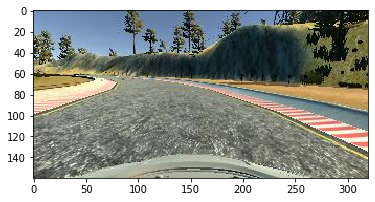

In [11]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense


model = Sequential()
model.add(Flatten(input_shape=(160, 320, 3)))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=15)

Using TensorFlow backend.









Train on 3351 samples, validate on 838 samples
Epoch 1/15




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()





3351/3351 [==============================] - 10s 3ms/step - loss: 18739952.8709 - val_loss: 14837.9676
Epoch 2/15
3351/3351 [==============================] - 1s 293us/step - loss: 8129.1978 - val_loss: 5543.3511
Epoch 3/15
3351/3351 [==============================] - 1s 317us/step - loss: 4212.1284 - val_loss: 3779.5789
Epoch 4/15
3351/3351 [==============================] - 1s 305us/step - loss: 3624.8620 - val_loss: 3096.8490
Epoch 5/15
3351/3351 [==============================] - 1s 303us/step - loss: 3539.4282 - val_loss: 1991.5862
Epoch 6/15
3351/3351 [==============================] - 1s 299us/step - loss: 3053.3854 - val_loss: 1775.2845
Epoch 7/15
3351/3351 [==============================] - 1s 296us/step - loss: 2366.1885 - val_loss: 2895.7668
Epoch 8/15
3351/3351 [==============================] - 1s 304us/step - loss: 3024.9289 - val_loss: 1908.3227
Epoch 9/15
3351/3351 [==============================] - 1s 299us/step - loss: 2132.0253 - val_loss: 1615.8134
Epoch 10/15
33

In [0]:
model.save('model.h5')

In [0]:
# !wget https://www.dropbox.com/s/nv83v86mjt6hj85/model.h5?dl=0

In [0]:
del X_train, y_train, images, measurements, model

## Running Your Network

[元の動画](https://youtu.be/1UGOJGg-0dU)

In [16]:
HTML(r'<iframe width="551" height="310" src="https://www.youtube.com/embed/1UGOJGg-0dU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Github上の公式リポジトリをクローンして、`model.h5`を引数として指定してファイルを以下のように実行します。

```sh
python drive.py model.h5
```

こうするとシミュレータ上のアプリに対してポートが開かれるため、シミュレータで自動運転モードを実行しましょう。

## Data Preprocessing

前処理に関しては、kerasの[Lambda Layers](https://keras.io/layers/core/#lambda)を使用します。

[元の動画](https://youtu.be/Oc7cLOS03PE)

In [17]:
HTML(r'<iframe width="551" height="310" src="https://www.youtube.com/embed/Oc7cLOS03PE" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('\\')[-1]
    current_path = './data2/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)


X_train = np.array(images)
y_train = np.array(measurements)

In [20]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda


model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 3351 samples, validate on 838 samples
Epoch 1/1
3351/3351 [==============================] - 1s 387us/step - loss: 3.5563 - val_loss: 0.2282


In [0]:
model.save('model-preprocessing.h5')

In [0]:
del X_train, y_train, images, measurements, model

## More Network

[元の動画](https://youtu.be/rVusn6F5i7s)

In [23]:
HTML(r'<iframe width="598" height="336" src="https://www.youtube.com/embed/rVusn6F5i7s" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('\\')[-1]
    current_path = './data2/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)


X_train = np.array(images)
y_train = np.array(measurements)

In [25]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Conv2D, AveragePooling2D


model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5)


Train on 3351 samples, validate on 838 samples
Epoch 1/5
3351/3351 [==============================] - 8s 2ms/step - loss: 0.0863 - val_loss: 0.0200
Epoch 2/5
3351/3351 [==============================] - 3s 769us/step - loss: 0.0127 - val_loss: 0.0181
Epoch 3/5
3351/3351 [==============================] - 3s 769us/step - loss: 0.0113 - val_loss: 0.0166
Epoch 4/5
3351/3351 [==============================] - 3s 782us/step - loss: 0.0099 - val_loss: 0.0150
Epoch 5/5
3351/3351 [==============================] - 3s 781us/step - loss: 0.0088 - val_loss: 0.0147


In [0]:
model.save('model-lenet.h5')

In [0]:
del X_train, y_train, images, measurements, model

## Data Augmentation

[元の動画](https://youtu.be/2oaB2_DhmF8)

[filp method](http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#flip)

In [28]:
HTML(r'<iframe width="551" height="310" src="https://www.youtube.com/embed/2oaB2_DhmF8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [0]:
images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('\\')[-1]
    current_path = './data2/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

In [0]:
augmented_images = []
augmented_measurements = []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)

    augmented_images.append(cv2.flip(image, 1))
    augmented_measurements.append(measurement * -1.0)


X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

In [31]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Conv2D, AveragePooling2D


model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5)

Train on 6702 samples, validate on 1676 samples
Epoch 1/5
6702/6702 [==============================] - 6s 884us/step - loss: 0.0391 - val_loss: 0.0167
Epoch 2/5
6702/6702 [==============================] - 5s 775us/step - loss: 0.0105 - val_loss: 0.0152
Epoch 3/5
6702/6702 [==============================] - 5s 770us/step - loss: 0.0086 - val_loss: 0.0153
Epoch 4/5
6702/6702 [==============================] - 5s 773us/step - loss: 0.0072 - val_loss: 0.0163
Epoch 5/5
6702/6702 [==============================] - 5s 775us/step - loss: 0.0050 - val_loss: 0.0207


In [0]:
model.save('model-lenet-augment.h5')

In [0]:
del X_train, y_train, images, measurements, model

## Using Multiple Cameras

[元の講義](https://classroom.udacity.com/nanodegrees/nd013/parts/168c60f1-cc92-450a-a91b-e427c326e6a7/modules/6b6c37bc-13a5-47c7-88ed-eb1fce9789a0/lessons/3fc8dd70-23b3-4f49-86eb-a8707f71f8dd/concepts/2cd424ad-a661-4754-8421-aec8cb018005)

[元の動画](https://youtu.be/GumTdw9mjL0)

In [34]:
HTML(r'<iframe width="551" height="310" src="https://www.youtube.com/embed/GumTdw9mjL0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

実際のカメラでは、車体に複数のカメラが取り付けられており、各カメラを使用します。

中央の画像と左の画像を使用して学習に使用する場合、同じステアリングの角度を使用してはいけません。車を徐々に左に傾けていく場合、中央の画像から撮影された画像と紐づいているステアリング角度に対して、左から見る場合にはステアリング角度をより緩やかにする必要があります。

NVIDIAの[論文](http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf)

![](https://i.gyazo.com/204702781c8c0d20e1a3e196be8615bc.png)


In [0]:
def get_fname(path):
    return path.split('\\')[-1]

In [0]:
images = []
measurements = []
for line in lines:
    correction = 0.2
    for i in range(3):
        steering = float(line[3])
        if i == 1:
            steering += + correction
        elif i == 2:  
            steering -= correction

        dirpath = 'data2/IMG/'
        image = cv2.imread(dirpath + get_fname(line[i]))
        
        images.append(image)
        measurements.append(steering)
        images.append(cv2.flip(image, 1))
        measurements.append(steering * -1.0)
        

X_train = np.array(images)
y_train = np.array(measurements)

In [37]:
X_train.shape, y_train.shape

((25134, 160, 320, 3), (25134,))

In [38]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Conv2D, AveragePooling2D


model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5)

Train on 20107 samples, validate on 5027 samples
Epoch 1/5
20107/20107 [==============================] - 16s 812us/step - loss: 0.0193 - val_loss: 0.0151
Epoch 2/5
20107/20107 [==============================] - 15s 766us/step - loss: 0.0092 - val_loss: 0.0160
Epoch 3/5
20107/20107 [==============================] - 16s 779us/step - loss: 0.0075 - val_loss: 0.0169
Epoch 4/5
20107/20107 [==============================] - 16s 777us/step - loss: 0.0059 - val_loss: 0.0187
Epoch 5/5
20107/20107 [==============================] - 16s 773us/step - loss: 0.0044 - val_loss: 0.0186


In [0]:
model.save('model-lenet-augment-3direction.h5')

In [0]:
del X_train, y_train, images, measurements, model

## Keras Cropping Image

[元の動画](https://youtu.be/SpPxyW-869U)